<a href="https://colab.research.BVHle.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.BVHle.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
! pip install tensorflow pandas matplotlib 
 

/Users/macbook/.zshenv:1: command not found: c
Defaulting to user installation because normal site-packages is not writeable


In [107]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [108]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ACB = pd.read_csv("./Database/Pre_Processed_ACB.csv")
BIDV = pd.read_csv("./Database/Pre_Processed_BIDV.csv")
BVH = pd.read_csv("./Database/Pre_Processed_BVH.csv")
CTG = pd.read_csv("./Database/Pre_Processed_CTG.csv")
FPT = pd.read_csv("./Database/Pre_Processed_FPT.csv")

### Data Proprocessing

In [109]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [110]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [111]:
model = Model()

In [112]:

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 5, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

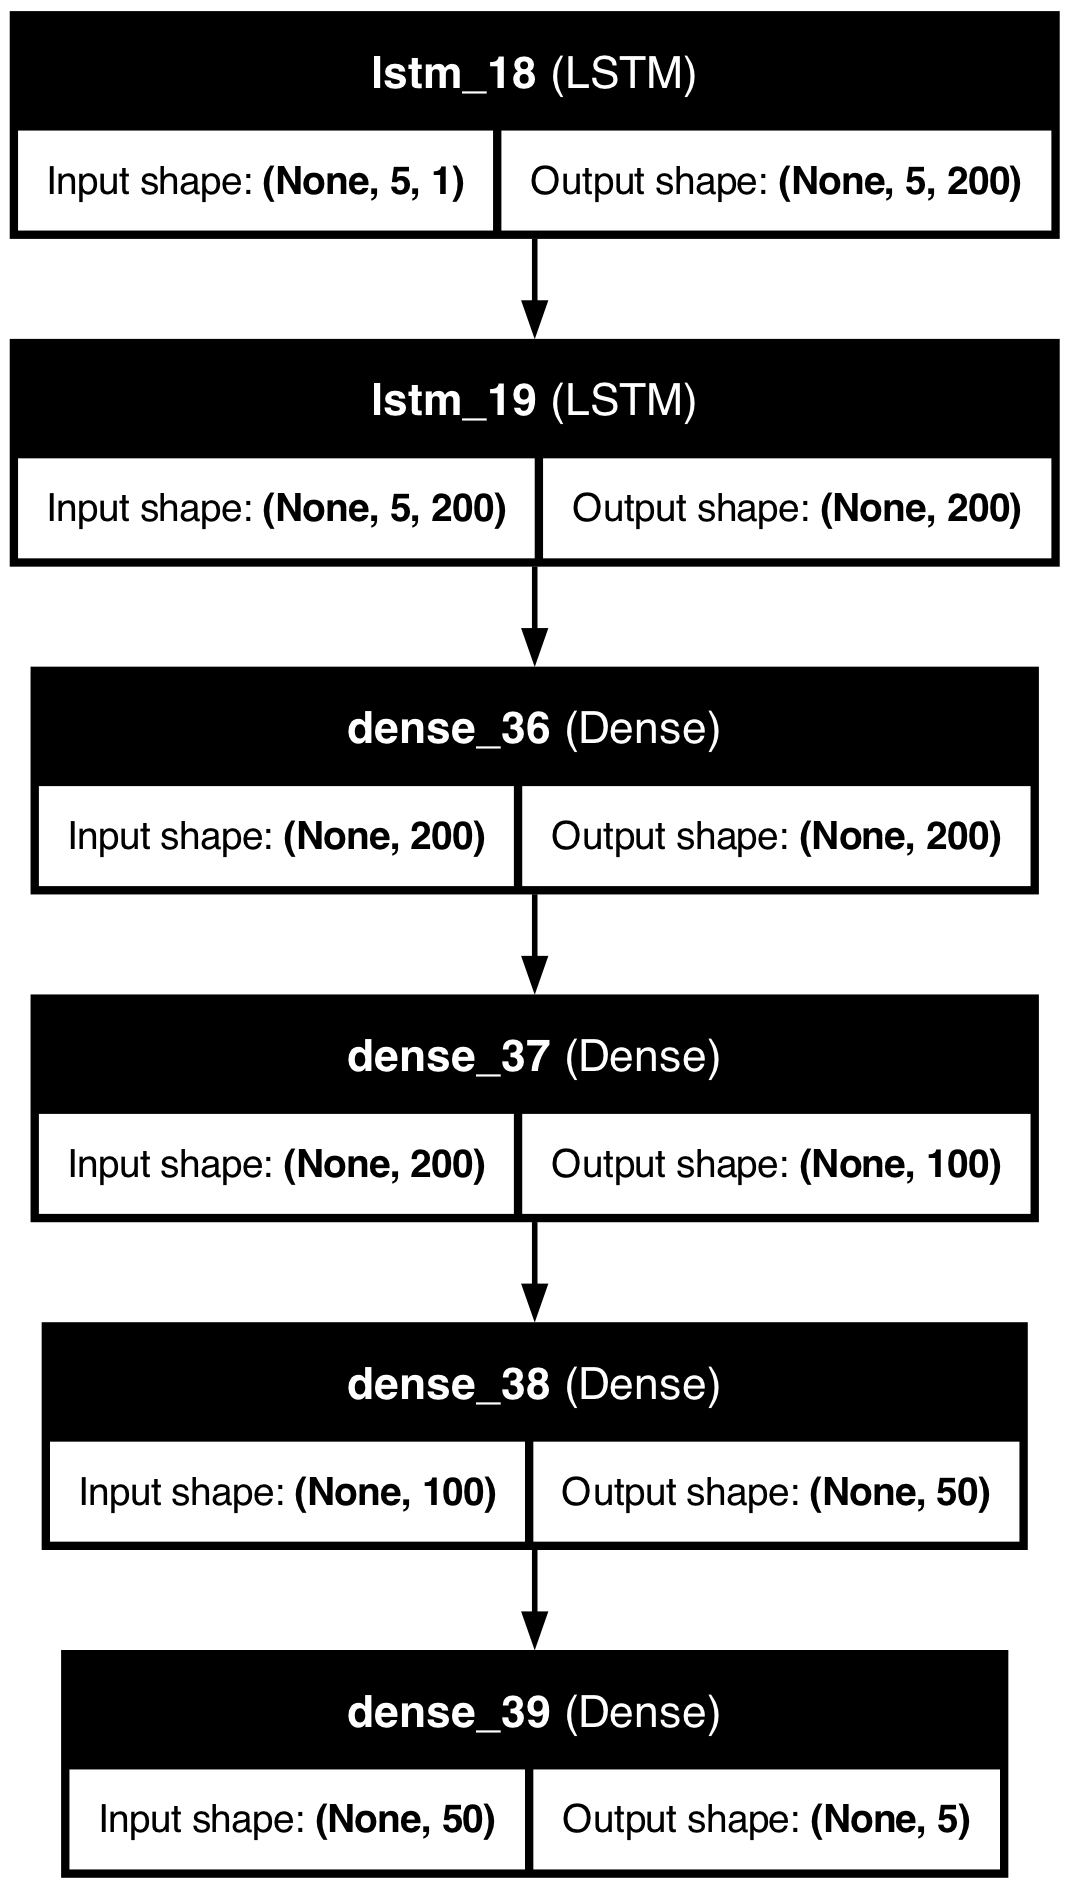

In [113]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True )

### Custom Learning Rate

In [114]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

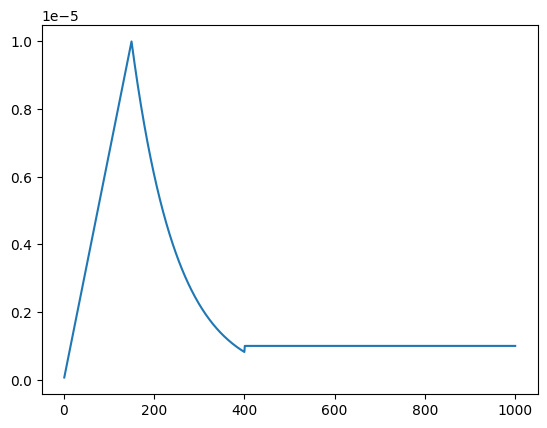

In [115]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [116]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [117]:
ACB.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02 00:00:00,11.703,11.693,11.416,11.544,1103106.0
1,2019-01-03 00:00:00,10.398,11.360,10.267,11.110,1956382.0
2,2019-01-04 00:00:00,11.070,11.413,11.052,11.189,2771983.0
3,2019-01-07 00:00:00,11.426,11.402,11.244,11.347,1305819.0
4,2019-01-08 00:00:00,12.414,12.378,11.235,11.268,846226.0


In [118]:
ACB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1427 non-null   object 
 1   Open        1427 non-null   float64
 2   High        1427 non-null   float64
 3   Low         1427 non-null   float64
 4   Adj. Close  1427 non-null   float64
 5   Volume      1427 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.0+ KB


In [119]:
# Change Dtype of Date column
#["Date"] = pd.to_datetime(ACB["Date"])

### Split the Data into Training and Test set


In [120]:
ACB_Date = '2023-07-21'
ACB_Train_X, ACB_Train_Y, ACB_Test_X, ACB_Test_Y = Dataset(ACB, ACB_Date)

### Model Fitting

In [121]:
ACB_Model = Model()

In [122]:
ACB_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [123]:
ACB_hist = ACB_Model.fit(ACB_Train_X, ACB_Train_Y, epochs = 1000, validation_data = (ACB_Test_X, ACB_Test_Y), callbacks=[callback])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 292.1443 - root_mean_squared_error: 17.0913 - val_loss: 606.0433 - val_root_mean_squared_error: 24.6179 - learning_rate: 0.0000e+00
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 286.7251 - root_mean_squared_error: 16.9306 - val_loss: 606.0372 - val_root_mean_squared_error: 24.6178 - learning_rate: 6.6667e-08
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 306.2573 - root_mean_squared_error: 17.4978 - val_loss: 606.0251 - val_root_mean_squared_error: 24.6176 - learning_rate: 1.3333e-07
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 293.1754 - root_mean_squared_error: 17.1216 - val_loss: 606.0069 - val_root_mean_squared_error: 24.6172 - learning_rate: 2.0000e-07
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 305.5852 - root_mean_squared_error: 17.4772 - val_loss: 605.9816 - val_root_mean_squared_error: 24.6167 - learning_rate: 2.6667e-07
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

In [124]:
history_dict = ACB_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

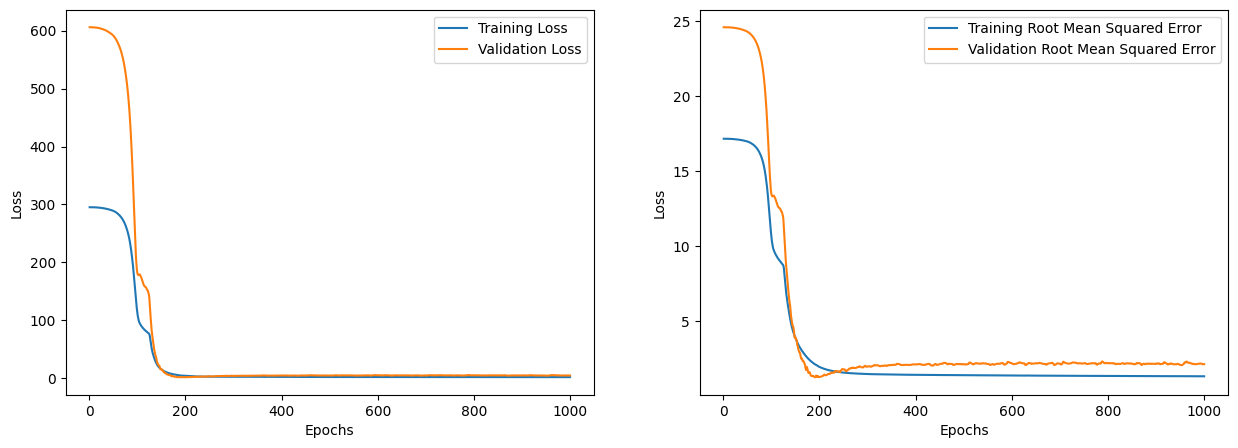

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of ACB

In [126]:
ACB_prediction = ACB_Model.predict(ACB_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


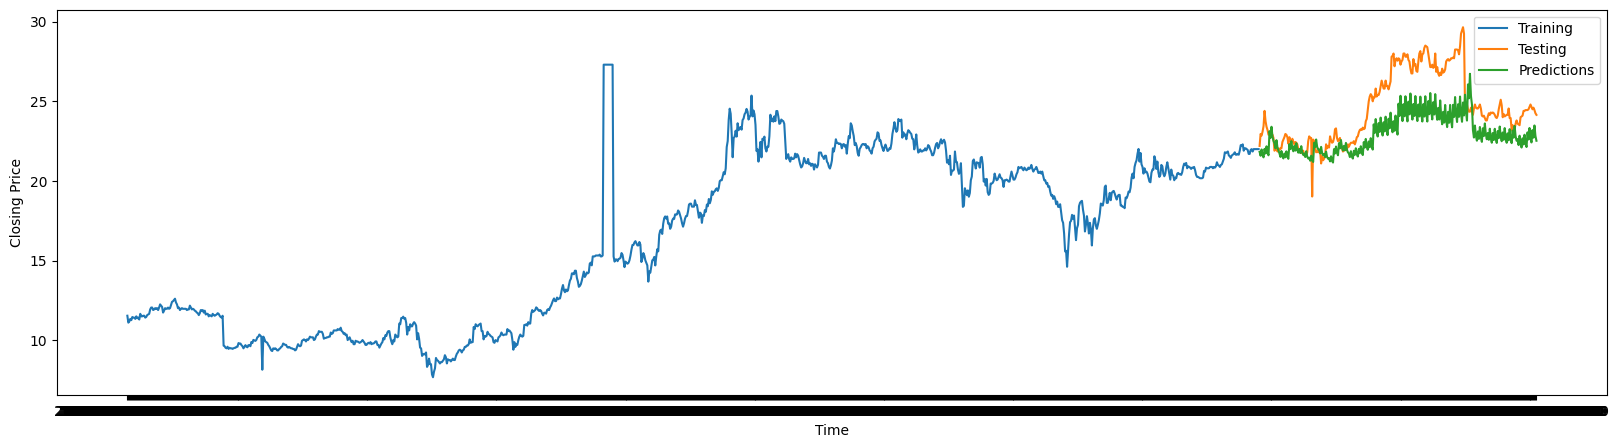

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
ACB_Test_Y = np.ravel(ACB_Test_Y)  # Flatten if necessary
ACB_prediction = np.ravel(ACB_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
# Ensure dates for the testing period align with the length of ACB_Test_Y
ACB_Test_Data = pd.DataFrame({
    'Date': ACB['Date'][ACB['Date'] >= test_start_date].reset_index(drop=True)[:len(ACB_Test_Y)],
    'Adj. Close': ACB_Test_Y
})

# Add predictions to the DataFrame
ACB_Test_Data['Predictions'] = ACB_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(ACB['Date'][ACB['Date'] < test_start_date], ACB['Adj. Close'][ACB['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(ACB_Test_Data['Date'], ACB_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(ACB_Test_Data['Date'], ACB_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [128]:

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional and have the same length
ACB_Test_Y = np.ravel(ACB_Test_Y)
ACB_prediction = np.ravel(ACB_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(ACB_Test_Y, ACB_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((ACB_Test_Y - ACB_prediction) / ACB_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(ACB_Test_Y, ACB_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(ACB_Test_Y - ACB_prediction) / np.sqrt(len(ACB_Test_Y))
print(f'SEM: {sem}')


RMSE: 2.1515274144884806
MAPE: 6.729219554726698%
MAE: 1.73691325503758
SEM: 0.08475749909616014


# BIDV

In [129]:
BIDV.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02,22.968,22.968,22.334,22.367,805700.0
1,2019-01-03,22.367,22.568,21.366,21.366,1107500.0
2,2019-01-04,21.032,21.333,20.565,21.065,1457300.0
3,2019-01-07,21.366,22.034,21.366,21.566,806060.0
4,2019-01-08,21.767,21.767,21.299,21.366,558540.0


In [130]:
BIDV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1422 non-null   object 
 1   Open        1422 non-null   float64
 2   High        1422 non-null   float64
 3   Low         1422 non-null   float64
 4   Adj. Close  1422 non-null   float64
 5   Volume      1422 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.8+ KB


In [131]:
# Change Dtype of Date column
BIDV["Date"] = pd.to_datetime(BIDV["Date"])

### Split the Data into Training and Test set
    

In [152]:
BIDV_Date = '2023-07-21'
BIDV_Train_X, BIDV_Train_Y, BIDV_Test_X, BIDV_Test_Y = Dataset(BIDV, BIDV_Date)

### Model Fitting

In [153]:
BIDV_Model = Model()

In [154]:
BIDV_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [155]:
BIDV_hist = BIDV_Model.fit(BIDV_Train_X, BIDV_Train_Y, epochs = 200, validation_data = (BIDV_Test_X, BIDV_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 948.4868 - root_mean_squared_error: 30.7966 - val_loss: 2069.3010 - val_root_mean_squared_error: 45.4896 - learning_rate: 0.0000e+00
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 944.9835 - root_mean_squared_error: 30.7395 - val_loss: 2069.2681 - val_root_mean_squared_error: 45.4892 - learning_rate: 6.6667e-08
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 941.6510 - root_mean_squared_error: 30.6840 - val_loss: 2069.2034 - val_root_mean_squared_error: 45.4885 - learning_rate: 1.3333e-07
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 950.5036 - root_mean_squared_error: 30.8299 - val_loss: 2069.1047 - val_root_mean_squared_error: 45.4874 - learning_rate: 2.0000e-07
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 950.2643 - root_mean_squared_error: 30.8220 - val_loss: 2068.9690 - val_root_mean_squared_error: 45.4859 - learning_rate: 2.6667e-07
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

In [156]:
history_dict = BIDV_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

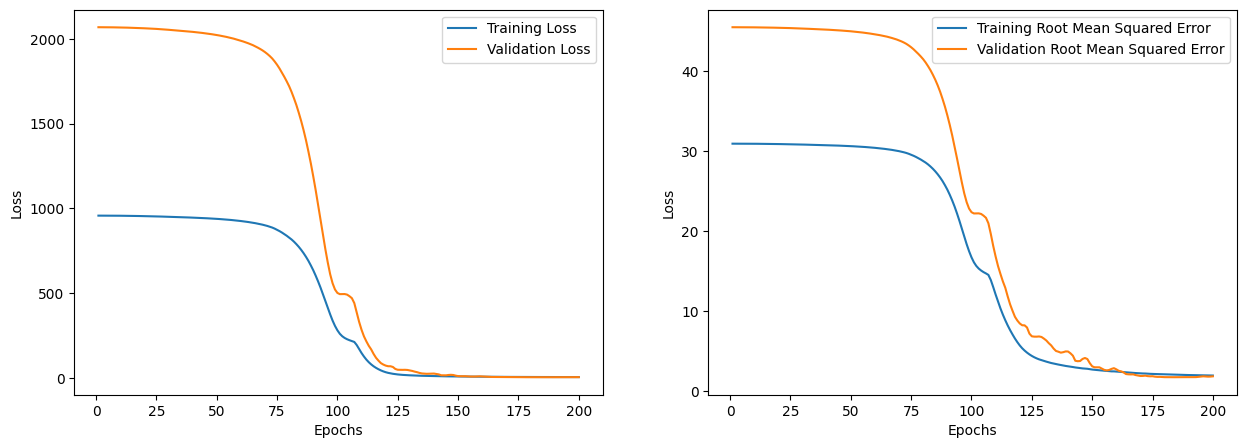

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()
plt.show()

### Predicting the closing stock price of BIDV

In [158]:
BIDV_prediction = BIDV_Model.predict(BIDV_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


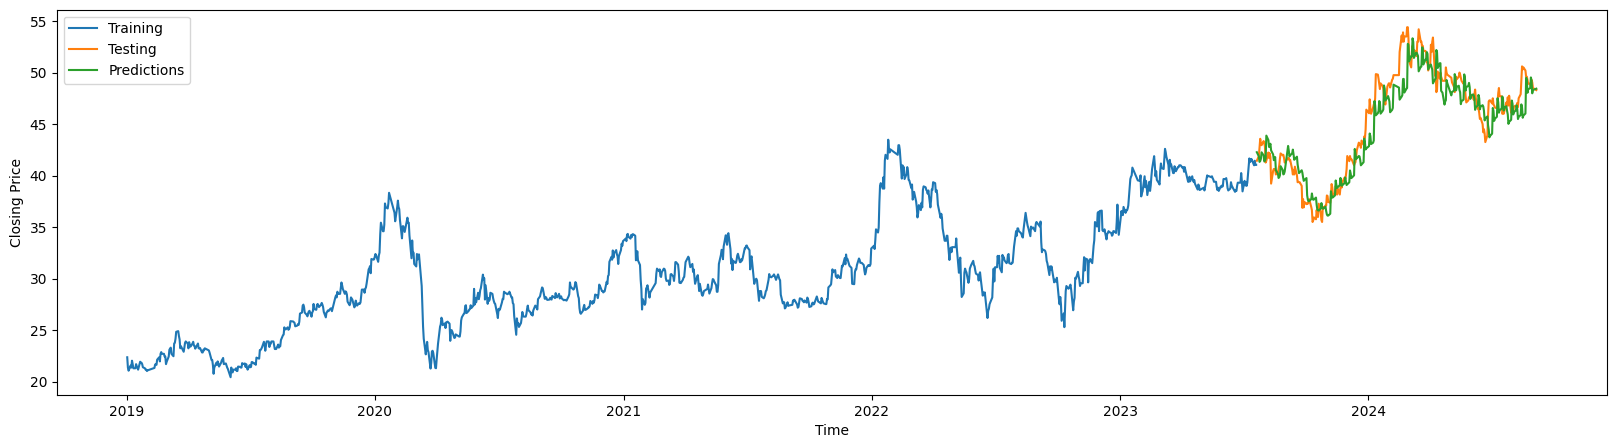

In [160]:

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
BIDV_Test_Y = np.ravel(BIDV_Test_Y)  # Flatten if necessary
BIDV_prediction = np.ravel(BIDV_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
BIDV_Test_Data = pd.DataFrame({
    'Date': BIDV['Date'][BIDV['Date'] >= test_start_date].reset_index(drop=True)[:len(BIDV_Test_Y)],
    'Adj. Close': BIDV_Test_Y
})

# Add predictions to the DataFrame
BIDV_Test_Data['Predictions'] = BIDV_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(BIDV['Date'][BIDV['Date'] < test_start_date], BIDV['Adj. Close'][BIDV['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(BIDV_Test_Data['Date'],BIDV_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(BIDV_Test_Data['Date'], BIDV_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [162]:
BIDV_Test_Y = np.ravel(BIDV_Test_Y)
BIDV_prediction = np.ravel(BIDV_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(BIDV_Test_Y, BIDV_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((BIDV_Test_Y - BIDV_prediction) / BIDV_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(BIDV_Test_Y, BIDV_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(BIDV_Test_Y - BIDV_prediction) / np.sqrt(len(BIDV_Test_Y))
print(f'SEM: {sem}')


RMSE: 1.862203618712157
MAPE: 3.16970826084607%
MAE: 1.4522223193577357
SEM: 0.10590504168894349


# BVH

In [141]:
BVH.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02,79.787,79.787,78.119,78.119,87080.0
1,2019-01-03,79.436,79.875,77.593,78.295,55310.0
2,2019-01-04,78.295,78.295,75.486,77.768,96940.0
3,2019-01-07,78.558,79.699,76.978,77.768,92970.0
4,2019-01-08,77.768,77.768,77.241,77.417,36610.0


In [142]:
BVH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1422 non-null   object 
 1   Open        1422 non-null   float64
 2   High        1422 non-null   float64
 3   Low         1422 non-null   float64
 4   Adj. Close  1422 non-null   float64
 5   Volume      1422 non-null   float64
dtypes: float64(5), object(1)
memory usage: 66.8+ KB


In [143]:
# Change Dtype of Date column
BVH["Date"] = pd.to_datetime(BVH["Date"])

### Split the Data into Training and Test set


In [144]:
BVH_Date = '2023-07-21'
BVH_Train_X, BVH_Train_Y, BVH_Test_X, BVH_Test_Y = Dataset(BVH, BVH_Date)

### Model Fitting

In [145]:
BVH_Model = Model()

In [146]:
BVH_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [147]:
BVH_hist = BVH_Model.fit(BVH_Train_X, BVH_Train_Y, epochs = 1000, validation_data = (BVH_Test_X, BVH_Test_Y), callbacks = [callback])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3061.5518 - root_mean_squared_error: 55.3234 - val_loss: 1808.5271 - val_root_mean_squared_error: 42.5268 - learning_rate: 0.0000e+00
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3020.6536 - root_mean_squared_error: 54.9576 - val_loss: 1808.5039 - val_root_mean_squared_error: 42.5265 - learning_rate: 6.6667e-08
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2945.5950 - root_mean_squared_error: 54.2646 - val_loss: 1808.4581 - val_root_mean_squared_error: 42.5260 - learning_rate: 1.3333e-07
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3062.6306 - root_mean_squared_error: 55.3377 - val_loss: 1808.3895 - val_root_mean_squared_error: 42.5252 - learning_rate: 2.0000e-07
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2985.1240 - root_mean_squared_error: 54.6355 - val_loss: 1808.2980 - val_root_mean_squared_error: 42.5241 - learning_rate: 2.6667e-07
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━

In [148]:
history_dict = BVH_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

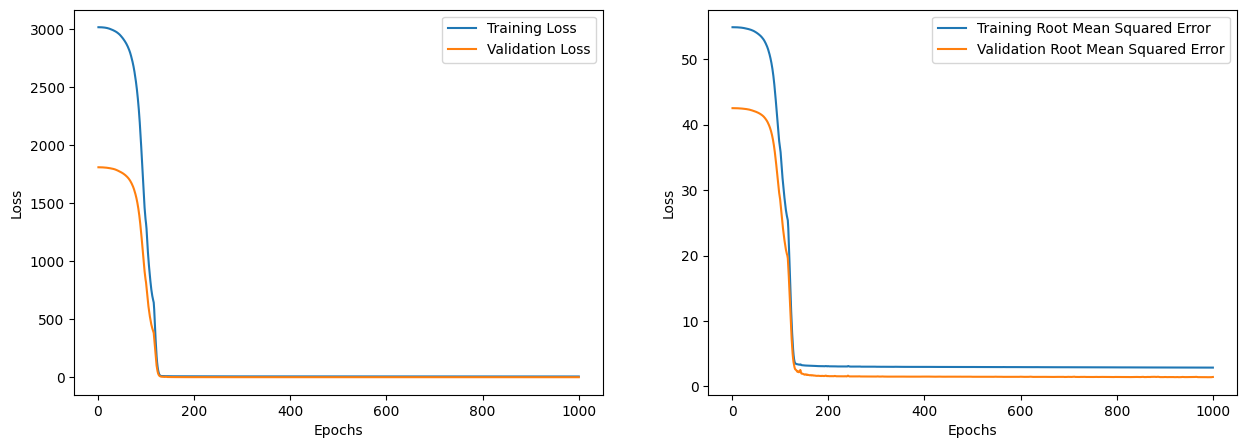

In [149]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of BVHle

In [150]:
BVH_prediction = BVH_Model.predict(BVH_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


ValueError: x and y must have same first dimension, but have shapes (959,) and (280,)

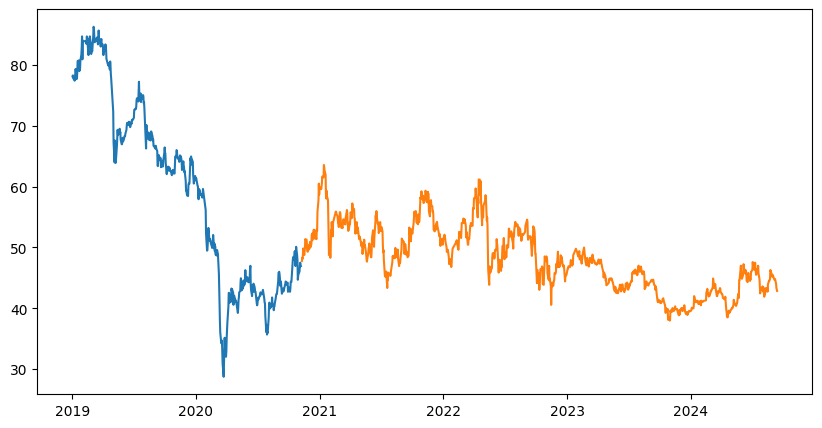

In [151]:
plt.figure(figsize=(10, 5))
plt.plot(BVH['Date'][BVH['Date'] < '2020-11-07'], BVH['Adj. Close'][BVH['Date'] < '2020-11-07'], label = 'Training')
plt.plot(BVH['Date'][BVH['Date'] >= '2020-11-07'], BVH['Adj. Close'][BVH['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(BVH['Date'][BVH['Date'] >= '2020-11-07'], BVH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

#Microsoft

In [ ]:
MSFT.head()

In [ ]:
MSFT.info()

In [51]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [52]:
MSFT_Date = '2020-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

### Model Fitting

In [53]:
MSFT_Model = Model()

In [54]:
MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

In [56]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Microsoft

In [ ]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'][MSFT['Date'] < '2020-10-12'], MSFT['Adj. Close'][MSFT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-09'], MSFT['Adj. Close'][MSFT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

#Amazon

In [ ]:
AMZN.head()

In [ ]:
AMZN.info()

In [63]:
# Change Dtype of Date column
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [64]:
AMZN_Date = '2020-11-01'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(AMZN, AMZN_Date)

### Model Fitting

In [65]:
AMZN_Model = Model()

In [66]:
AMZN_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

In [68]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Amazon

In [ ]:
AMZN_prediction = AMZN_Model.predict(AMZN_Test_X)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(AMZN['Date'][AMZN['Date'] < '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] < '2020-11-07'], label = 'Training')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Test_Y.reshape(-1, 5))/np.abs(AMZN_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')